# Web Scraping

In [83]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
% matplotlib inline

## Example 1: Hacker News

In [4]:
html_doc = requests.get('https://news.ycombinator.com/').text
html_doc

u'<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?PhuKoantg5oMWYOxn7py">\n        <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <title>Hacker News</title>\n      </head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="http://www.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>\n                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>\n              <a href="newest">new</a> | <a href="newcomments">comments<

### Basic Document Information

In [12]:
soup = BeautifulSoup(html_doc)
print(soup.title) # Find the 'title' tag
print(soup.title.string) # Find the 'title' tag's text value

<title>Hacker News</title>
Hacker News


In [15]:
# We can get all the text from elements in the HTML
# to get an easy dataset for the webpage's text content
print(soup.get_text())




Hacker News


Hacker News
new | comments | show | ask | jobs | submit 
login




1. Epiphany-V: A 1024-core 64-bit RISC processor (parallella.org)
230 points by ivank 4 hours ago  | hide | 138 comments 


2. Show HN: A new decentralized microblogging platform (github.com)
162 points by daveid 3 hours ago  | hide | 64 comments 


3. Typora – A cross platform markdown editor (typora.io)
104 points by algorithmsRcool 2 hours ago  | hide | 35 comments 


4. Total Functional Programming [pdf] (psu.edu)
79 points by adgasf 3 hours ago  | hide | 27 comments 


5. A bot crawled thousands of studies looking for simple math errors (vox.com)
221 points by MollyR 7 hours ago  | hide | 103 comments 


6. Apple Has Removed Dash from the App Store (kapeli.com)
373 points by ingve 2 hours ago  | hide | 131 comments 


7. The Dizzying Grandeur of 21st Century Agriculture (nytimes.com)
15 points by adriand 54 minutes ago  | hide | discuss 


8. MailChimp’s founders built the company slowly by anticip

In [22]:
print soup.a # This gives us the first link ('a') tag in the document

# We can also iterate over all the link tags in a document
for link in soup.find_all('a'):
    print(link.get('href'))

<a href="http://www.ycombinator.com"><img height="18" src="y18.gif" style="border:1px white solid;" width="18"/></a>
http://www.ycombinator.com
news
newest
newcomments
show
ask
jobs
submit
login?goto=news
vote?id=12645661&how=up&goto=news
https://www.parallella.org/2016/10/05/epiphany-v-a-1024-core-64-bit-risc-processor/?
from?site=parallella.org
user?id=ivank
item?id=12645661
hide?id=12645661&goto=news
item?id=12645661
vote?id=12646083&how=up&goto=news
https://github.com/Gargron/mastodon
from?site=github.com
user?id=daveid
item?id=12646083
hide?id=12646083&goto=news
item?id=12646083
vote?id=12646511&how=up&goto=news
https://www.typora.io/
from?site=typora.io
user?id=algorithmsRcool
item?id=12646511
hide?id=12646511&goto=news
item?id=12646511
vote?id=12646390&how=up&goto=news
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.106.364&rep=rep1&type=pdf
from?site=psu.edu
user?id=adgasf
item?id=12646390
hide?id=12646390&goto=news
item?id=12646390
vote?id=12643978&how=up&goto=news
ht

In [30]:
# Suppose we know the class of an element we want to search for.
# We can pass that in as a parameter to narrow our search
for story_link in soup.find_all('a', {'class': 'storylink'}):
    print(story_link.text, story_link.get('href'))

(u'Epiphany-V: A 1024-core 64-bit RISC processor', 'https://www.parallella.org/2016/10/05/epiphany-v-a-1024-core-64-bit-risc-processor/?')
(u'Show HN: A new decentralized microblogging platform', 'https://github.com/Gargron/mastodon')
(u'Typora \u2013 A cross platform markdown editor', 'https://www.typora.io/')
(u'Total Functional Programming [pdf]', 'http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.106.364&rep=rep1&type=pdf')
(u'A bot crawled thousands of studies looking for simple math errors', 'http://www.vox.com/science-and-health/2016/9/30/13077658/statcheck-psychology-replication')
(u'Apple Has Removed Dash from the App Store', 'https://blog.kapeli.com/apple-removed-dash-from-the-app-store')
(u'The Dizzying Grandeur of 21st Century Agriculture', 'http://www.nytimes.com/interactive/2016/10/09/magazine/big-food-photo-essay.html')
(u'MailChimp\u2019s founders built the company slowly by anticipating customers\u2019 needs', 'http://www.nytimes.com/2016/10/06/technology/mailch

In [77]:
stories = []
for news_row in soup.find_all('tr', {'class': 'athing'}):
    # We can use the same commands on children nodes of the document
    # (.find() returns the first found result)
    story = news_row.find('a', {'class': 'storylink'})
    story_name, story_link = story.text, story.get('href')

    # We're not restricted just to searching up and down the document,
    # We can search accross 'siblings'
    meta_data_row = news_row.find_next_sibling('tr')
    
    score, comments = None, None
    
    # Need to check if the story has a score
    if meta_data_row.find('span', {'class': 'score'}):
        score = int(meta_data_row.find('span', {'class': 'score'}).text.split()[0])
    
    # If you know regular expressions, you can use those to search for patterns
    # in the document
    comments_pattern = re.compile(r'comments')
    if meta_data_row.find('a', text=comments_pattern):
        comments = int(meta_data_row.find('a', text=comments_pattern).text.split()[0])
    
    stories.append({
            'name': story_name,
            'link': story_link,
            'score': score,
            'comments': comments
        })

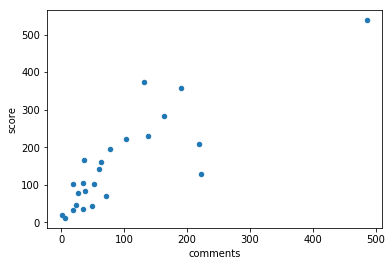

In [87]:
stories_df = pd.DataFrame(stories)
stories_df.plot.scatter('comments', 'score')

## Example 2: Crawling the Web

# Challenges
#### These may take you a bit longer! 😉

## Challenge 1:
Write a function that, given the name of a subreddit, will return you a DataFrame with the same data that we scraped from the HackerNews news page. (Story name / link, Score, and # of comments).

(i.e. `subreddit_scraper('dataisbeautiful')` would be the function call)

In [89]:
def subreddit_scraper(sub_str):
    pass